# Project: The movie database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In a general context, we want to know the most popular types of films and determine what constitutes this popularity.
To do this, we suggest that you prepare the data set and explore this data.

At first, we will note the popular film genres. Then, we will try to identify the characteristics of this popularity.

For this analysis we used packages below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

We previously downloaded 'tmdb-movies' dataset in order to read it:

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


To start, we will check: 1 - Columns headings 2 - Unnecessary data 3 - Data types 4 - Missing values 5 - Duplicates rows 6 - Conclusion

### 1 - Columns heading

For the moment, we need not to modify columns title. It seems some data are not useful for our study.

### 2 - Unnecessary data

Let's take a look columns:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Visually, these columns ('id','imdb_id','homepage','tagline','overview','keywords') do not give any relevant information.

Let's take a closer look:

In [4]:
df.id, df.imdb_id, df.homepage, df.tagline, df.overview, df.keywords

(0        135397
 1         76341
 2        262500
 3        140607
 4        168259
 5        281957
 6         87101
 7        286217
 8        211672
 9        150540
 10       206647
 11        76757
 12       264660
 13       257344
 14        99861
 15       273248
 16       260346
 17       102899
 18       150689
 19       131634
 20       158852
 21       307081
 22       254128
 23       216015
 24       318846
 25       177677
 26       214756
 27       207703
 28       314365
 29       294254
           ...  
 10836     38720
 10837     19728
 10838     22383
 10839     13353
 10840     34388
 10841     42701
 10842     36540
 10843     29710
 10844     23728
 10845      5065
 10846     17102
 10847     28763
 10848      2161
 10849     28270
 10850     26268
 10851     15347
 10852     37301
 10853     15598
 10854     31602
 10855     13343
 10856     20277
 10857      5921
 10858     31918
 10859     20620
 10860      5060
 10861        21
 10862     20379
 10863     397

Indeed, for our analysis, it is not useful to keep this data.

### 3 - Data types

It is better to convert the dates, namely : release_date and release_year columns.

### 4 - Missing values

There are many missing values in this data frame. However, some of them are included in unnecessary columns. So, we will check after their deletion.

### 5 - Duplicates rows

We will check for duplicate rows after all changes.

### 6 - Conclusion

For cleaning, we will delete the unused columns. After that, we will analyze the missing data and check for duplicates.

### Data Cleaning of the movie database

Drop unused columns:

In [5]:
df.drop(['id','imdb_id','homepage','tagline','keywords', 'overview'],axis=1, inplace=True)

In [6]:
for i,column in enumerate(df.columns):
     print(i,column)

0 popularity
1 budget
2 revenue
3 original_title
4 cast
5 director
6 runtime
7 genres
8 production_companies
9 release_date
10 vote_count
11 vote_average
12 release_year
13 budget_adj
14 revenue_adj


Convert release_date column:

In [7]:
df['release_date']=pd.to_datetime(df['release_date'])

Missing values analysis:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [9]:
df[df.cast.isnull()]


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,2015-11-25,47,6.9,2015,0.000000e+00,0.000000e+00
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,2015-10-09,37,8.2,2015,0.000000e+00,0.000000e+00
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,2015-01-24,19,7.8,2015,0.000000e+00,0.000000e+00
536,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,2015-10-08,12,8.0,2015,0.000000e+00,0.000000e+00
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,2015-01-01,11,8.9,2015,0.000000e+00,0.000000e+00
587,0.062536,0,0,The Hunting Ground,NaN,Kirby Dick,103,Documentary,NaN,2015-02-27,39,7.8,2015,0.000000e+00,0.000000e+00
600,0.047256,0,0,Star Wars: TIE Fighter,NaN,Paul Johnson,7,Science Fiction|Action|Animation,NaN,2015-03-24,29,7.6,2015,0.000000e+00,0.000000e+00
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015,0.000000e+00,0.000000e+00
1088,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,83,Documentary,NaN,2014-03-28,70,7.8,2014,0.000000e+00,1.384967e+06
1173,0.159037,0,0,The Search for General Tso,NaN,Ian Cheney,71,Documentary,NaN,2014-04-20,14,6.9,2014,0.000000e+00,0.000000e+00


In [10]:
df[df.director.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,2015-01-23,14,6.6,2015,0.000000e+00,0.000000e+00
548,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,2015-08-10,12,7.5,2015,0.000000e+00,0.000000e+00
556,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,2015-01-24,14,6.5,2015,0.000000e+00,0.000000e+00
1032,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,2014-03-18,32,6.3,2014,0.000000e+00,0.000000e+00
1054,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,NaN,2014-01-19,11,7.2,2014,0.000000e+00,0.000000e+00
1203,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,Valve,2014-03-19,40,7.0,2014,1.381637e+05,0.000000e+00
1241,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,2014-01-01,18,5.7,2014,0.000000e+00,0.000000e+00
1288,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,2 Entertain Video,2014-11-17,12,6.8,2014,0.000000e+00,0.000000e+00
1852,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,2009-01-09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,A B Corp,2009-12-04,11,6.1,2009,3.303301e+06,0.000000e+00


In [11]:
df[df.runtime.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [12]:
df[df.genres.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,2015-10-29,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,2014-10-03,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2009-02-27,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,2009-02-27,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,NaN,2010-06-05,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,NaN,2010-12-25,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,NaN,2001-02-02,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,NaN,2008-08-13,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,BBC,2012-07-27,12,8.3,2012,0.00000,0.0


In [13]:
df[df.production_companies.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,2015-01-24,36,7.8,2015,0.000000e+00,0.000000e+00
259,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,2015-11-27,10,7.6,2015,0.000000e+00,0.000000e+00
295,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,2015-11-26,12,6.3,2015,0.000000e+00,0.000000e+00
298,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,2015-09-14,10,4.7,2015,0.000000e+00,0.000000e+00
328,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,2015-06-23,29,6.4,2015,0.000000e+00,0.000000e+00
370,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,Jimmy Chin|Elizabeth Chai Vasarhelyi,89,Adventure|Documentary,NaN,2015-01-25,42,6.9,2015,0.000000e+00,2.147489e+06
374,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,Caryn Waechter,104,Mystery|Drama|Thriller,NaN,2015-04-10,25,6.6,2015,0.000000e+00,0.000000e+00
382,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,Kris Swanberg,90,Drama|Comedy,NaN,2015-07-24,22,5.7,2015,0.000000e+00,0.000000e+00
388,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,Anna Mastro,87,Drama|Comedy,NaN,2015-03-13,12,5.2,2015,6.439997e+05,0.000000e+00
393,0.283194,2000000,0,Night Of The Living Deb,Maria Thayer|Chris Marquette|Ray Wise|Michael ...,Kyle Rankin,85,Comedy|Horror,NaN,2015-08-29,13,5.7,2015,1.839999e+06,0.000000e+00


All columns with missing values have no budget or revenue for the most part.
It is displayed 0.

Then, the production_companies column contains 9836 rows. It is not possible to align this column to a number of rows of 10866.

So, we delete all the missing data.

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.2+ MB


Now, There is no more missing values.


Let's check for duplicates:

In [16]:
sum(df.duplicated())

1

let's remove it:

In [17]:
df.drop_duplicates(inplace=True)

Now, we are ready to analyse data.

<a id='eda'></a>
## Exploratory Data Analysis


### What are the most popular film genres?

Summary statistics:


In [18]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [19]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Get the median popularity:

In [20]:
median_popularity = df.popularity.median()

Select samples with popularity greater than or equal to the median:

In [21]:
high_popularity = df.query('popularity >= {}'.format(median_popularity))

In [22]:
high_popularity['genres'].value_counts()[0:10]

Comedy                  292
Drama                   284
Drama|Romance           137
Comedy|Romance          133
Comedy|Drama|Romance    110
Horror|Thriller         108
Comedy|Drama            105
Horror                   68
Drama|Thriller           59
Action|Thriller          57
Name: genres, dtype: int64

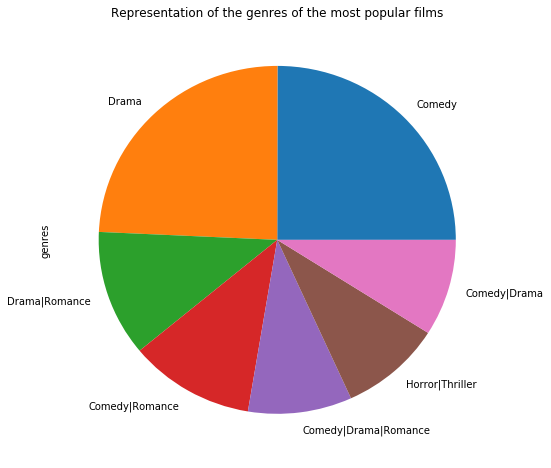

In [23]:
high_popularity['genres'].value_counts()[0:7].plot(kind='pie',title='Representation of the genres of the most popular films', figsize=(8,8));


The most popular film genres are Drama and Comedy.

Exemples de films représentatif du genre:

In [24]:
high_popularity_Comedy=high_popularity.query('genres == "Comedy"') 

In [25]:
high_popularity_Comedy.groupby(['genres','original_title'], as_index=True)['popularity'].count()

genres  original_title                                                                        
Comedy  17 Again                                                                                  1
        21 & Over                                                                                 1
        30 Nights of Paranormal Activity With the Devil Inside the Girl With the Dragon Tattoo    1
        A Cinderella Story                                                                        1
        A Few Best Men                                                                            1
        A Good Old Fashioned Orgy                                                                 1
        A Lot Like Love                                                                           1
        A Merry Friggin' Christmas                                                                1
        A Night at the Roxbury                                                                    1
     

Who are the actors and producers associated with this popularity?

In [26]:
high_popularity_Comedy['director'].value_counts()[0:3]

Dennis Dugan                     6
Adam McKay                       5
Bobby Farrelly|Peter Farrelly    5
Name: director, dtype: int64

In [27]:
high_popularity_Comedy['cast'].value_counts()[0:3]

Bradley Cooper|Ed Helms|Zach Galifianakis|Justin Bartha|Ken Jeong    2
Graham Chapman|John Cleese|Terry Gilliam|Eric Idle|Terry Jones       2
Jim Carrey|Jeff Daniels|Lauren Holly|Mike Starr|Karen Duffy          1
Name: cast, dtype: int64

### Focus on popularity

Identify strong relationships with the popularity:

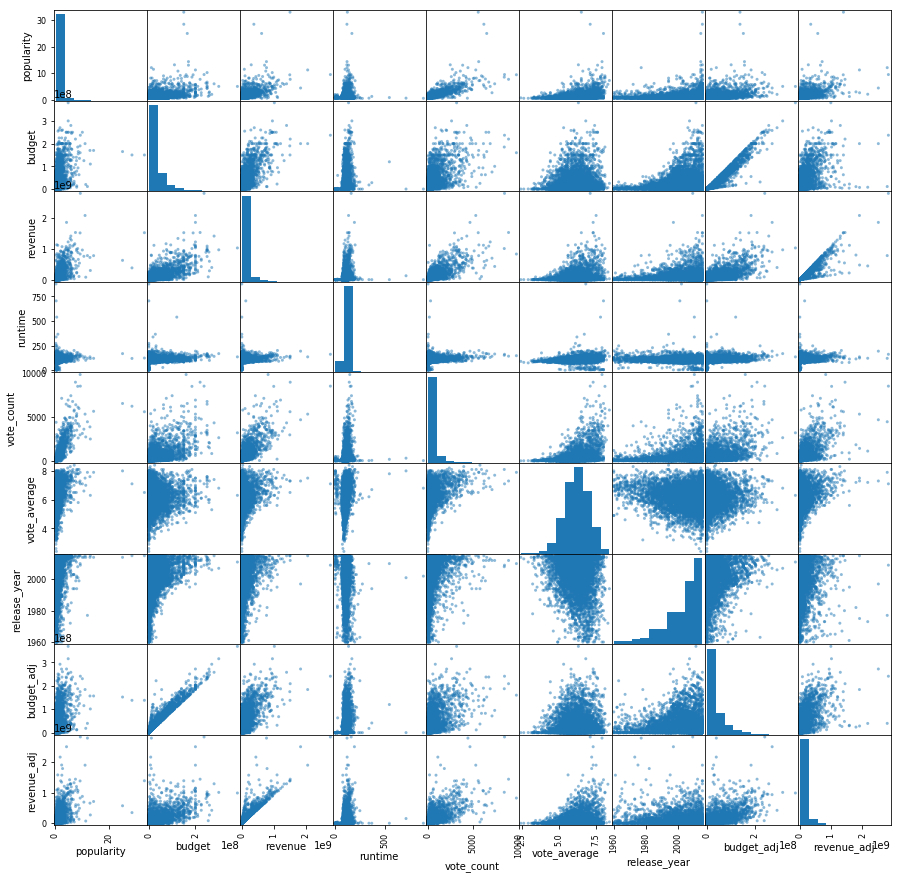

In [28]:
pd.plotting.scatter_matrix(high_popularity,figsize=(15,15));

This is an overview of the possible correlations between the different analysis variables.

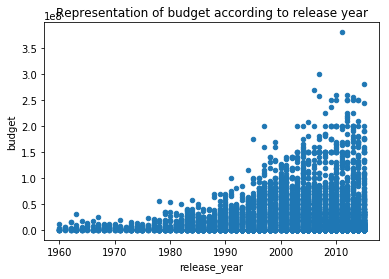

In [29]:
high_popularity.plot(x='release_year', y='budget', kind='scatter', title='Representation of budget according to release year')

We see that the budget increases over the years. 
Budget therefore has an influence on the popularity of films.

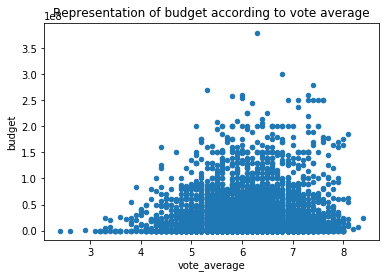

In [30]:
high_popularity.plot(x='vote_average', y='budget', kind='scatter',title='Representation of budget according to vote average')

There is an average vote between 5 and 7 for a budget between 1 and 2.
Overall, the more the budget increases, the more the average vote is correct.

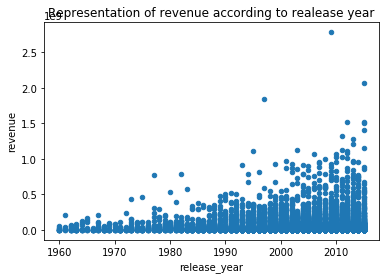

In [31]:
high_popularity.plot(x='release_year', y='revenue', kind='scatter',title='Representation of revenue according to realease year')

In [32]:
we clearly see that revenues increase over time.

SyntaxError: invalid syntax (<ipython-input-32-bf17a40e846a>, line 1)

In [ ]:
high_popularity.plot(x='budget', y='revenue', kind='scatter',title='Representation of revenue according to budget')

In [ ]:
we see that the budget increases, the more the revenues are increasing.

<a id='conclusions'></a>
## Conclusions



On average, the most popular types of movies are dramas and comedies.
However, we are not sure of the result. The characteristics that we have identified as a positive relationship with popularity are budget and income.
However, this is not enough and we have not been able to identify the element (s) clearly influencing popularity.
Indeed, we need much more information.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0